##  Titanic 

 1. 타이타닉의 생존율을 예측
 - 문제를 정의 (Defining the problem statement)
 - 데이터를 수집 (Collecting the data)
 - 데이터 탐색 (Exploratory data analysis)
 - 피처 엔지니어링 (Feature engineering)
 - 모델링 (Modelling)
 - 평가(Testing)

1. 문제 정의
    - 생존율 예측하는 문제
    - 어떤 패턴의 데이터 승객이 생존 했는지?


2. 데이터 수집
    - Kaggle 사이트(주말에 kaggle 회원 가입)
    - titanic_train.csv
    - 데이터 셋( train.csv, test.csv)

3. 데이터 읽어 오기
    - train 데이터에 읽어 오기
    - 기본 데이터 파악
        : 어떻게 생겼는지, 구성은 어떻게 되었는지, 컬럼은 어떤 변수로 구성되었는지, 결측치는 있는지? 

In [1]:
import pandas as pd
train = pd.read_csv("titanic_train.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'titanic_train.csv'

In [3]:
train.head()
#Survived: 살았는지 죽었는지
#Pclass: 선실 등급
#Sib Sp: 동승자 유무, 형제 배우자의 수
#Parch: 동승자 유무, 자녀 부모의 수 
#Cabin: 어느 선실
#Embarked: 어느 항구에서 탔느냐

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train.shape

(891, 12)

In [7]:
train.describe()
#12개의 컬럼 중, 7개의 컬럼만 나온 이유
# 데이터 값이 int나 float인 컬럼이 7개 

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#전체데이터 (891건)
# Age(177), Cabin(687) 결측치가 많음... Embarked 2건

5. 데이터 시각화 준비
    - matplotlib.pyplot as plt
    - Categorical Features -> Bar Chart
      +Pclass, Sex, SibSp, Parch, Embarked, Cabin

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

6. 성별, 생존유무의 인원수를 막대그래프로 그림
    - X축 생존유무( Survivied / Dead)
    - Y축 인원수
    - 성별(남/녀)

In [14]:
#survived = 생존자의 성별 인원 데이터
#dead = 사망자의 성별 인원 데이터
#df = dataframe([survived, dead])
#df.index = ["Survived", "Dead"]
#df.plot(kind="bar", stacked=True, figsize=(10,5))

In [16]:
#성별 생존 유무 인원수 막대 그래프
survived = train[train["Survived"] == 1]["Sex"].value_counts()
dead = train[train["Survived"]==0]["Sex"].value_counts()

In [17]:
survived

female    233
male      109
Name: Sex, dtype: int64

In [18]:
dead

male      468
female     81
Name: Sex, dtype: int64

<AxesSubplot:>

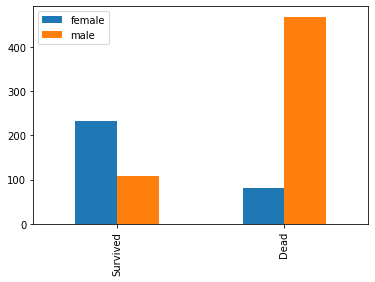

In [21]:
df = pd.DataFrame([survived, dead])
df.index = ["Survived", "Dead"]
df.plot(kind="bar")

<AxesSubplot:>

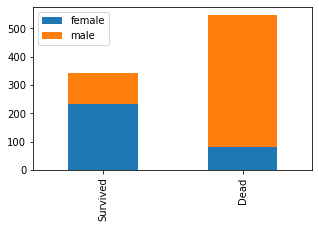

In [22]:
df.plot(kind='bar',stacked=True, figsize=(5,3)) 

In [ ]:
# 사망자가 생존자 보다 많다.
# 생존자는 여성 비율이 높고, 사망자는 남성 비율이 높다

6. Pcalss별, 생존유무의 인원수를 막대그래프로 그림
    - X축 생존유무( Survivied / Dead)
    - Y축 인원수
    - Pclass (1,2,3)

<AxesSubplot:>

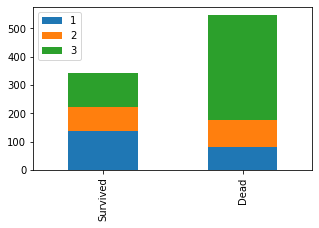

In [26]:
survived = train[train["Survived"] == 1]["Pclass"].value_counts()
dead = train[train["Survived"]==0]["Pclass"].value_counts()

df2 = pd.DataFrame([survived, dead])
df2.index = ["Survived", "Dead"]
df2.plot(kind="bar", stacked=True, figsize=(5, 3))

In [27]:
# 1등석이 생존이 높고.. 3등석이 사망이 많음

In [28]:
#Pclass, Sex, SibSp, Parch, Embarked, Cabin

6. ??별, 생존유무의 인원수를 막대그래프로 그림
    - bar_chart("??")
    - X축 생존유무( Survivied / Dead)
    - Y축 인원수

In [40]:
def bar_chart(x):
    survived = train[train["Survived"] == 1][x].value_counts()
    dead = train[train["Survived"]==0][x].value_counts()

    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", figsize=(5, 3))

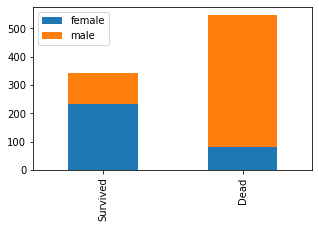

In [31]:
bar_chart("Sex")

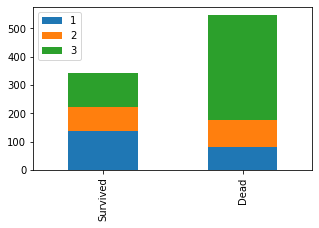

In [32]:
bar_chart("Pclass")

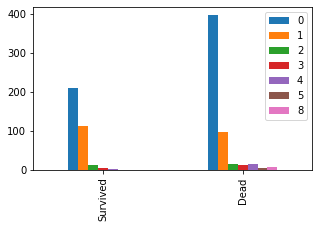

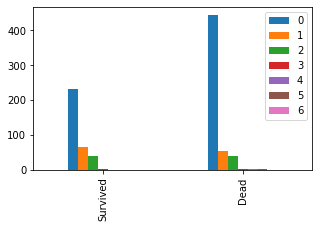

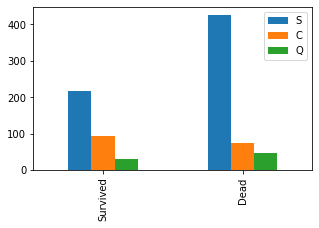

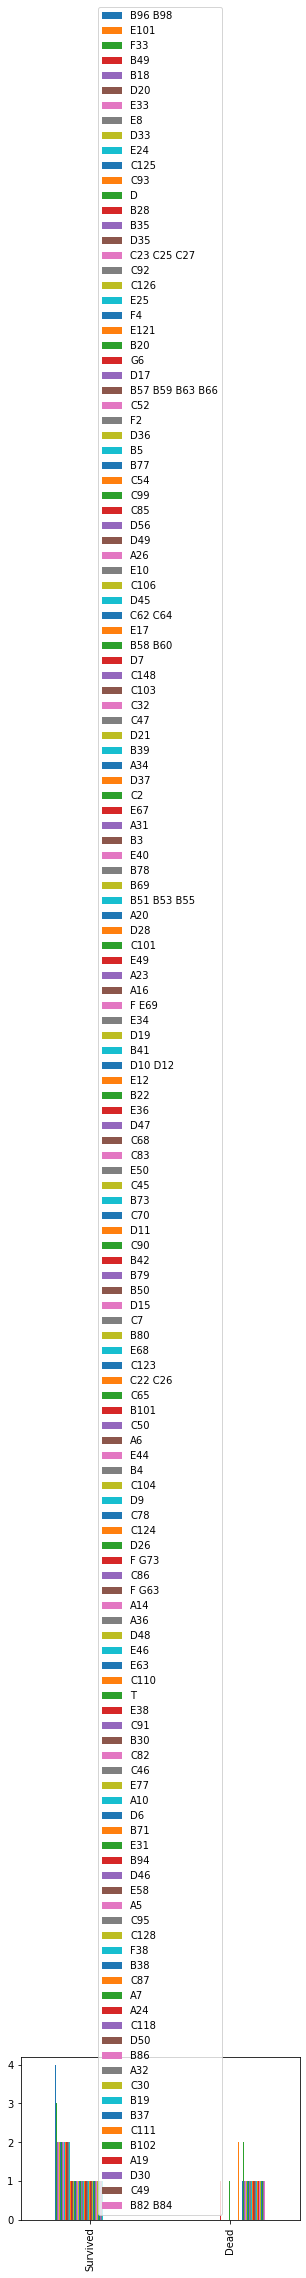

In [41]:
bar_chart("SibSp")
bar_chart("Parch")
bar_chart("Embarked")
bar_chart("Cabin")

In [42]:
#  홀로 탑승자 사망이 많다.


## Feature Engineering

In [43]:
train.head()
#의미 있는 데이터로 만들기

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S